# problem statement
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
!pip install keras
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense

In [2]:
data = pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data[:3]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
# Check and drop the duplicate values
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data[data.duplicated()].shape

(8, 31)

In [9]:
#drop the duplicate value
data1 = data.drop_duplicates()

In [10]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
data1.shape

(509, 31)

In [12]:
data2=data1.drop(data1.columns[10:30], axis=1)

In [13]:
data2.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small


In [14]:
data2.shape

(509, 11)

In [15]:
# Convert the categoricalvalues of size_category column to integer
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data2["size_category"] = label_encoder.fit_transform(data2["size_category"])

In [16]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [17]:
# Converting catergorical values of days and mothsinto into integers
data2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
data2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace = True)

In [18]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [19]:
import warnings
warnings.filterwarnings("ignore")

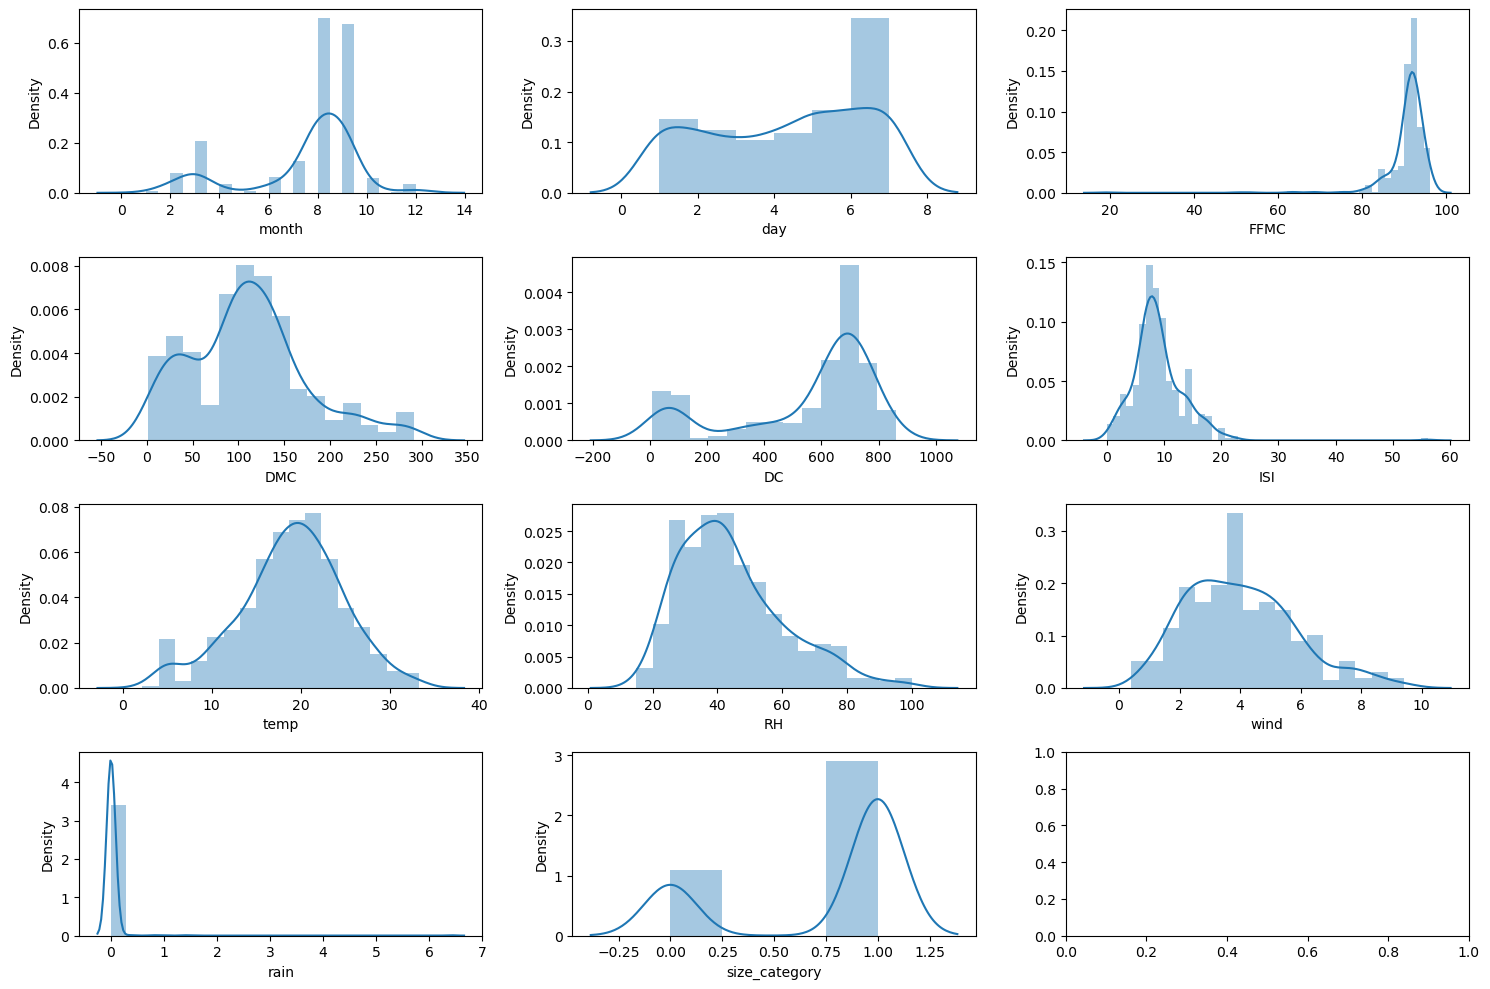

In [20]:
# Visualization using distplot
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(data2.month, ax=ax[0,0])
sns.distplot(data2.day, ax=ax[0,1])
sns.distplot(data2.FFMC, ax=ax[0,2])
sns.distplot(data2.DMC, ax=ax[1,0])
sns.distplot(data2.DC, ax=ax[1,1])
sns.distplot(data2.ISI, ax=ax[1,2])
sns.distplot(data2.temp, ax=ax[2,0])
sns.distplot(data2.RH, ax=ax[2,1])
sns.distplot(data2.wind, ax=ax[2,2])
sns.distplot(data2.rain, ax=ax[3,0])
sns.distplot(data2['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

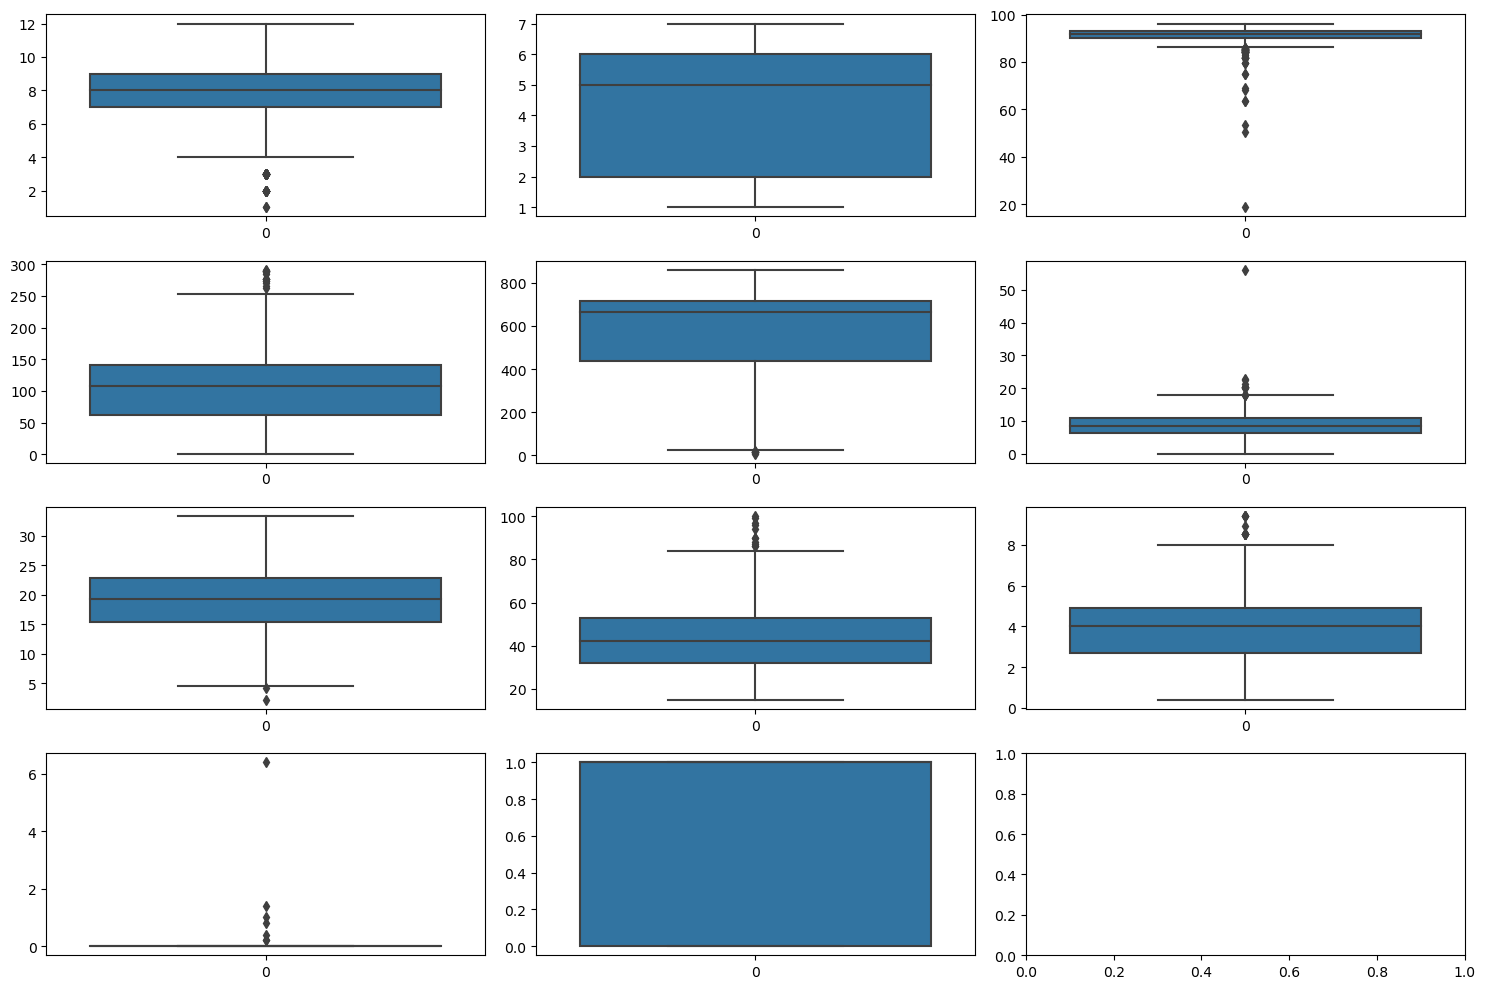

In [21]:
#Checking of the outlier
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(data2.month, ax=ax[0,0])
sns.boxplot(data2.day, ax=ax[0,1])
sns.boxplot(data2.FFMC, ax=ax[0,2])
sns.boxplot(data2.DMC, ax=ax[1,0])
sns.boxplot(data2.DC, ax=ax[1,1])
sns.boxplot(data2.ISI, ax=ax[1,2])
sns.boxplot(data2.temp, ax=ax[2,0])
sns.boxplot(data2.RH, ax=ax[2,1])
sns.boxplot(data2.wind, ax=ax[2,2])
sns.boxplot(data2.rain, ax=ax[3,0])
sns.boxplot(data2['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

In [22]:
X = data2.iloc[:,0:10].values
Y = data2.iloc[:,-1].values

In [23]:
X

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [24]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [26]:
# create model
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [27]:
# Compile model
model.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
# Fit the model
model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size=10)

Epoch 1/100


35/35 [==============================] - 2s 16ms/step - loss: 0.3996 - accuracy: 0.4282 - val_loss: 0.3729 - val_accuracy: 0.6012
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2474 - accuracy: 0.6452 - val_loss: 0.2934 - val_accuracy: 0.6012
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.2114 - accuracy: 0.6745 - val_loss: 0.2894 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1920 - accuracy: 0.7595 - val_loss: 0.2285 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1896 - accuracy: 0.7566 - val_loss: 0.2690 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.7595 - val_loss: 0.2697 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1868 - accuracy: 0.7566 - val_loss: 0.2245 - val_accuracy: 0.6726
Epoch 8/10

In [29]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.7387
accuracy: 54.57%


In [30]:
history = model.fit(X,Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1782 - accuracy: 0.7713 - val_loss: 0.2364 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.7713 - val_loss: 0.2400 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.7713 - val_loss: 0.2453 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1763 - accuracy: 0.7713 - val_loss: 0.2306 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1777 - accuracy: 0.7713 - val_loss: 0.2729 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1780 - accuracy: 0.7713 - val_loss: 0.2401 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1794 - accuracy: 0.7713 - val_loss: 0.2405 - val_accuracy: 0.6726
Epoch 8/100
3

In [31]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

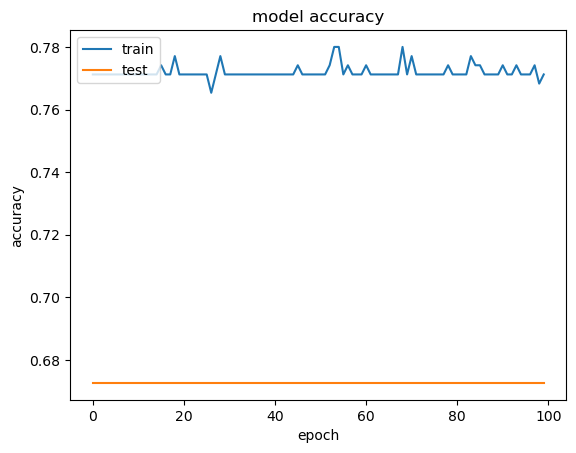

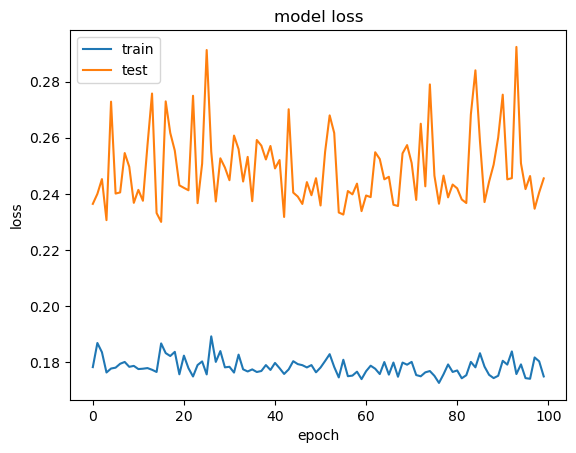

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [34]:
# Importing the necessary packages
!pip install keras.wrappers
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

ERROR: Could not find a version that satisfies the requirement keras.wrappers (from versions: none)
ERROR: No matching distribution found for keras.wrappers


ModuleNotFoundError: No module named 'keras.wrappers'

In [35]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [1]:
# Create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier

clf = KerasClassifier(build_fn=create_model,verbose=0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

ModuleNotFoundError: No module named 'keras.wrappers'